In [155]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))


customer-segmentation-tutorial-in-python
graduate-admissions
heart-disease-uci



**First of all,We are reading our csv. ** 

In [156]:
data=pd.read_csv("../input/heart-disease-uci/heart.csv")

**Our data info.**

In [157]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [158]:
data["age"].unique()

array([63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 58, 50, 66, 43, 69, 59,
       42, 61, 40, 71, 51, 65, 53, 46, 45, 39, 47, 62, 34, 35, 29, 55, 60,
       67, 68, 74, 76, 70, 38, 77])

In [159]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**  We will make plot for category-reviews numbers.**

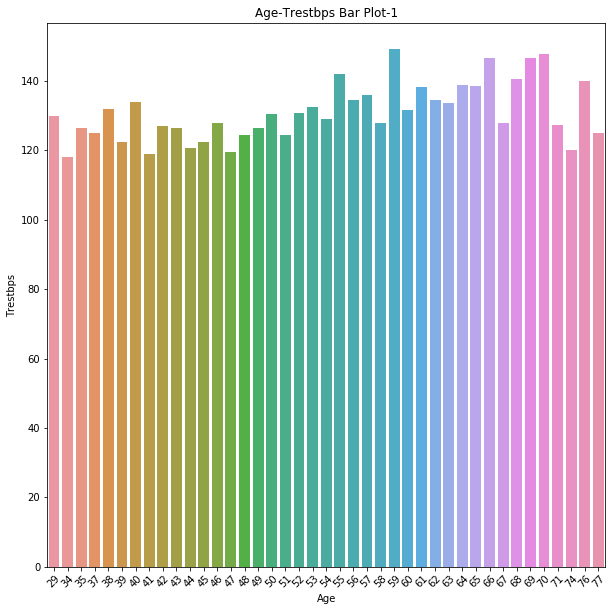

In [160]:
age_list=list(data["age"].unique())
trestbps_of_category=[]
for i in age_list:
    x=data[data["age"]==i]
    trestbps_value=sum(x.trestbps)/len(x)
    trestbps_of_category.append(trestbps_value)
datum=pd.DataFrame({"age_list":age_list,"trestbps_of_category":trestbps_of_category})
new_index=(datum["trestbps_of_category"].sort_values(ascending=False)).index.values
sorted_data=datum.reindex(new_index)
    

plt.figure(figsize=(10,10))
sns.barplot(x=sorted_data['age_list'], y=sorted_data['trestbps_of_category'])
plt.xticks(rotation= 45)
plt.xlabel('Age')
plt.ylabel('Trestbps')
plt.title('Age-Trestbps Bar Plot-1')
plt.show()
    

**Different bar plot.**



We are using seaborn dictionary.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


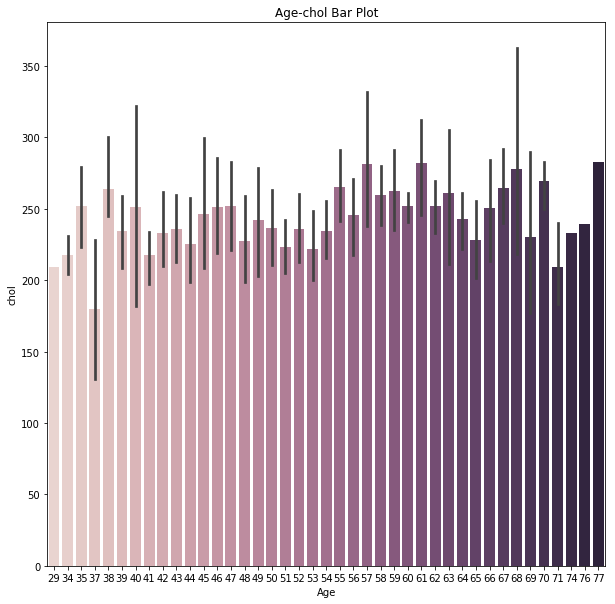

In [161]:
sorted_chol_data=data.chol.sort_values()
x,y=list(data.age),list(sorted_chol_data)

plt.figure(figsize=(10,10))
ax=sns.barplot(x=x,y=y,palette= sns.cubehelix_palette(len(data.age.unique())))
plt.xlabel("Age")
plt.ylabel("chol")
plt.title("Age-chol Bar Plot")
plt.show()

In [162]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


 ** Different Bar Plot**

[Text(0, 0.5, 'Age'),
 Text(0.5, 0, 'Trestpbs-Thalach-Chol'),
 Text(0.5, 1.0, ' Trestpbs-Thalach-Chol--Age Horizontal Bar Plot')]

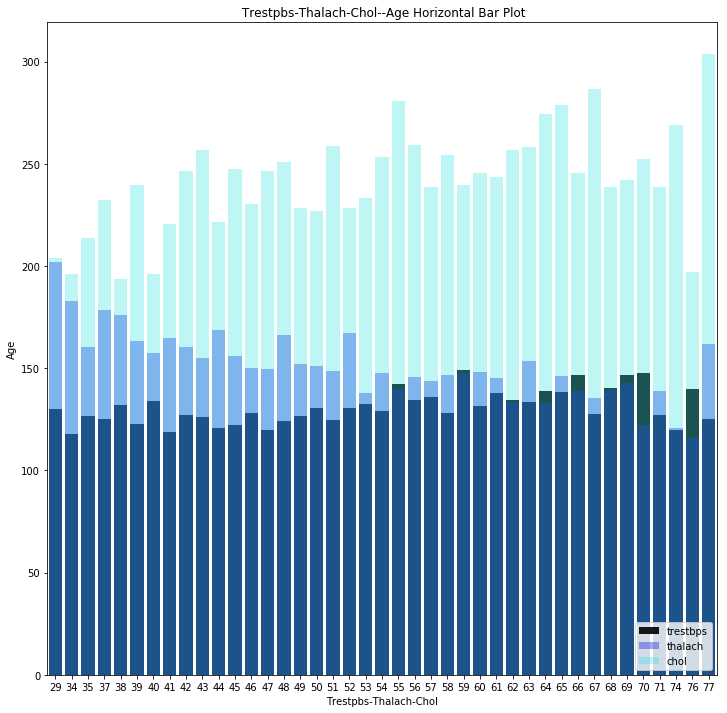

In [163]:
age_list=list(data["age"].unique())
trestbps= []
thalach= []
chol= []
for i in age_list:
    y=data[data["age"]==i]
    trestbps.append(sum(y.trestbps)/len(y))
    thalach.append(sum(y.thalach)/len(y))
    chol.append(sum(y.chol)/len(y))
f,ax=plt.subplots(figsize=(12,12))
sns.barplot(x=age_list,y=trestbps,color='black',alpha = 0.9,label='trestbps' )
sns.barplot(x=age_list,y=thalach,color='blue',alpha = 0.4,label='thalach')
sns.barplot(x=age_list,y=chol,color='cyan',alpha = 0.29,label='chol')
 
ax.legend(loc='lower right',frameon = True)    
ax.set(xlabel='Trestpbs-Thalach-Chol', ylabel='Age',title = " Trestpbs-Thalach-Chol--Age Horizontal Bar Plot")

**Point Plot**

In [164]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


With point plot,I did it for age/chol-trestbps relationship.

In [165]:
sorted_data

,age_list,trestbps_of_category
16,59,149.214286
38,70,147.750000
15,69,146.666667
13,66,146.571429
32,55,142.125000
35,68,140.500000
37,76,140.000000
10,64,138.800000
22,65,138.500000
18,61,138.125000


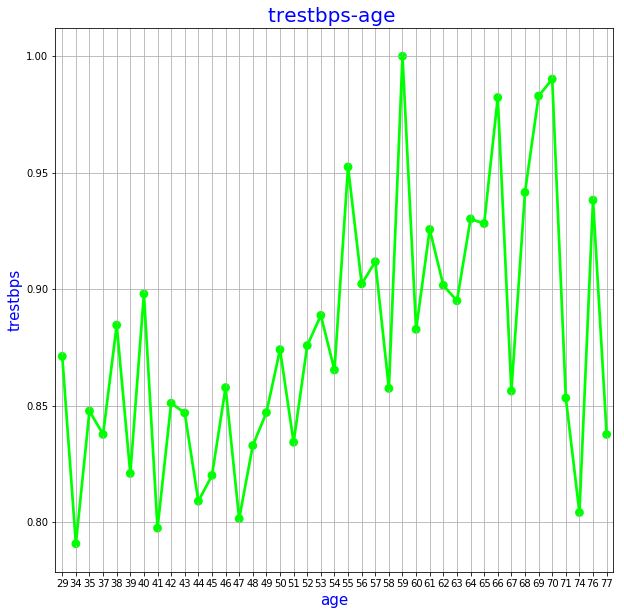

In [166]:
sorted_data['trestbps_of_category'] = sorted_data['trestbps_of_category']/max( sorted_data['trestbps_of_category'])
# we are using like that beacuse ıf we rate the numbers we will see numbers easily .

sorted_data.sort_values('trestbps_of_category',inplace=True)
 


f,ax1 = plt.subplots(figsize =(10,10))
sns.pointplot(x='age_list',y='trestbps_of_category',data=sorted_data,color='lime',alpha=0.8) 
 
plt.xlabel('age',fontsize = 15,color='blue')
plt.ylabel('trestbps',fontsize = 15,color='blue')
plt.title('trestbps-age ',fontsize = 20,color='blue')
plt.grid()

**Joint Plot**

We are using these plots for know relationship between datas.
For examle, let's take bottom example.We have sorted age list and sorted trestbps datas.With joint plot we will see correlation between datas.If the color density is high, there is so much correlation.

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


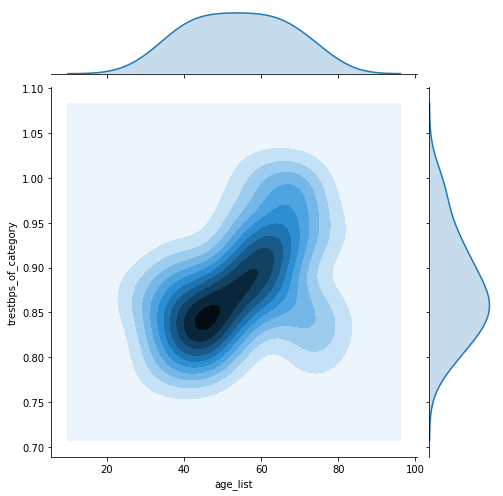

In [167]:
g = sns.jointplot(sorted_data.age_list, sorted_data.trestbps_of_category, kind="kde", size=7)
plt.savefig('graph.png')
plt.show()

Another joint plot example.

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


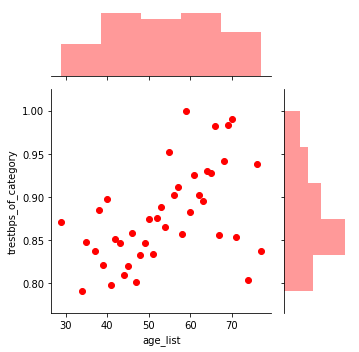

In [168]:
g = sns.jointplot("age_list", "trestbps_of_category", data=sorted_data,size=5, ratio=3, color="r")

**Pie Chart**

In [169]:
#for this chart I will use another dataset.
mall_customers_data=pd.read_csv("../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")

In [170]:
mall_customers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [171]:
mall_customers_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Text(0.5, 1.0, 'Killed People According to Races')

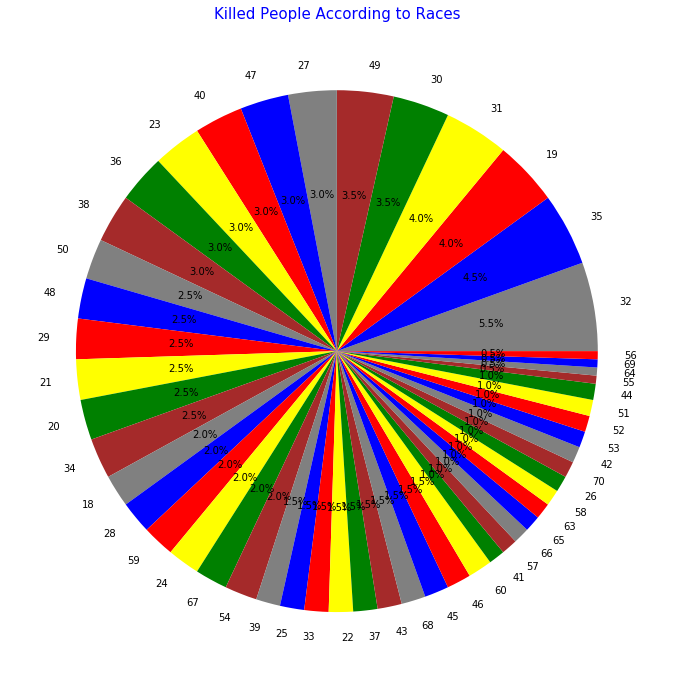

In [172]:
mall_customers_data.Age.dropna(inplace = True)
labels = mall_customers_data.Age.value_counts().index
colors = ['grey','blue','red','yellow','green','brown']
explode=np.zeros((len(mall_customers_data.Age.value_counts()),), dtype=np.int) 
 
 
sizes = mall_customers_data.Age.value_counts().values

#visulazation

plt.figure(figsize = (12,12))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Killed People According to Races',color = 'blue',fontsize = 15)

Actually I am aware it is little silly but I did this plot for showing different things(pandas functions) and propertys. 

**Lm Plot **

In [173]:
mall_customers_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Basically this plot used for linear regression.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


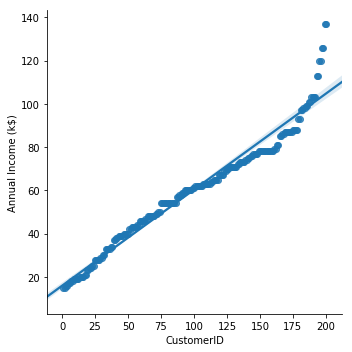

In [174]:
sns.lmplot(x="CustomerID", y="Annual Income (k$)", data=mall_customers_data)
plt.show()

You see the datas(Annual Income (k$) for every CustomerID.This line is making these ===> Looking datas and draws the line where their average is.

## Kde Plot

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


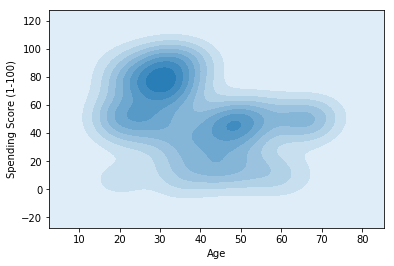

In [175]:
sns.kdeplot(mall_customers_data.Age, mall_customers_data["Spending Score (1-100)"], shade=True, cut=3)
plt.show()
#As we know,This plot type is working like joint plot.
#With shade=True we are adding coloring on this plot.

 ## Violin Plot

In [176]:
mall_customers_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


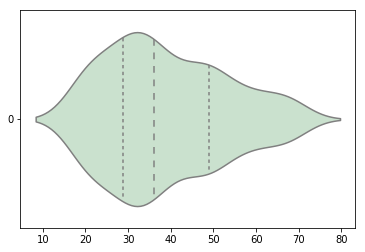

In [177]:
pal = sns.cubehelix_palette(5, rot=-.4, dark=.5)
sns.violinplot(data=mall_customers_data["Age"], palette=pal, inner="quartile",orient="h")
#orient="h" is horizontal ,orient="v" is vertival.Try and see the difference.
#palette is for color selection.
# inner can be "stick","quartile","box","point".İf you try you can see what are they doing.
plt.show()

## Heatmap 

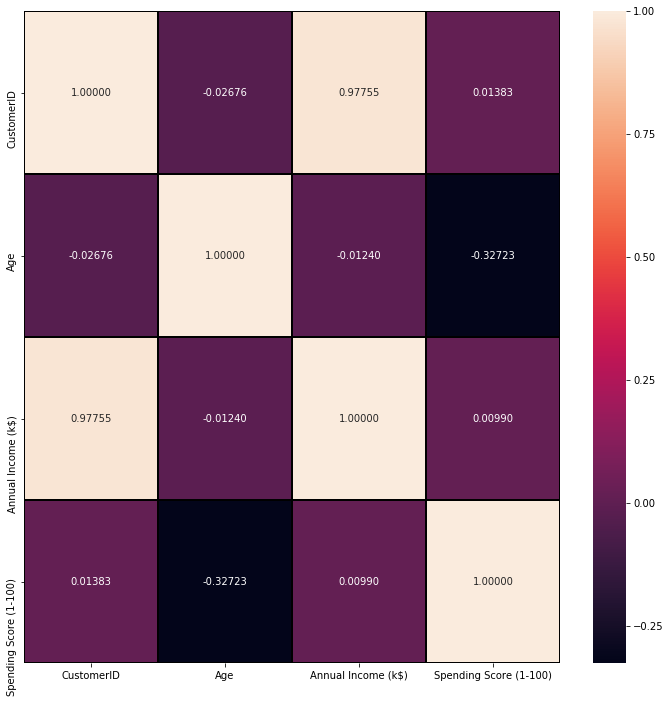

In [178]:
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(mall_customers_data.corr(), annot=True, linewidths=1,linecolor="Black", fmt= '.5f',ax=ax)
plt.show()

## Box Plot

In [179]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Box Plot

In [180]:
 data.sex.unique()

array([1, 0])

With this Box Plot , we  can see  where is our datas average .

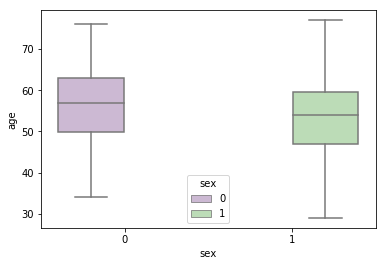

In [181]:
sns.boxplot(x="sex", y="age", hue="sex", data=data, palette="PRGn")
plt.show()



## Swarm Plot

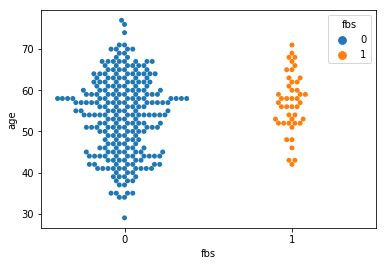

In [182]:
sns.swarmplot(x="fbs", y="age",hue="fbs", data=data)
plt.show()

## Pair Plot

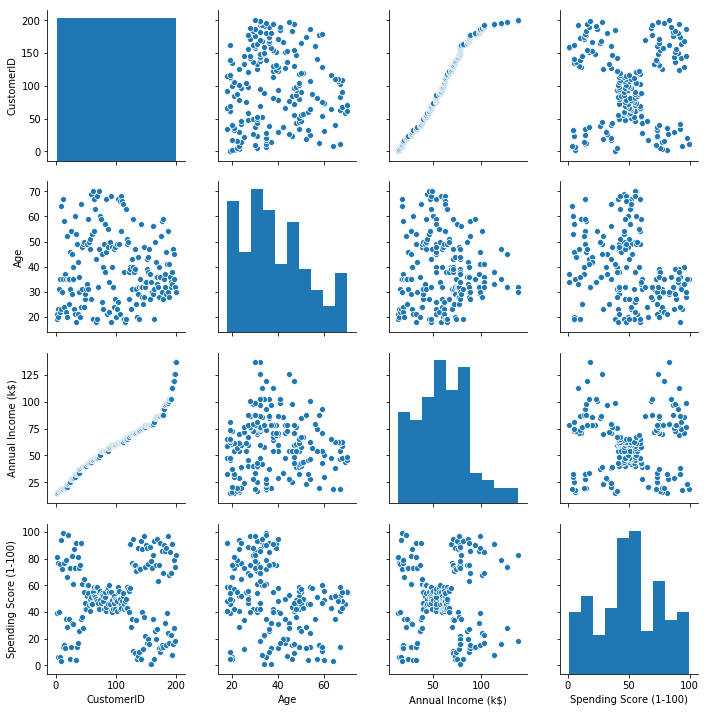

In [183]:
sns.pairplot(mall_customers_data)
plt.show()

## Count Plot

There are different useges of Count Plot.I will give examples in here.Generally,We are counting what we want.For example,First example.We are counting Custemers Sexs and  there diffent examples and usages like that.

Text(0.5, 1.0, 'Sex Counts')

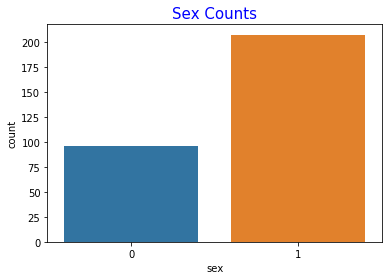

In [184]:
 
sns.countplot(data.sex )
 
plt.title("Sex Counts",color = 'blue',fontsize=15)

Text(0.5, 1.0, 'Customers Ages')

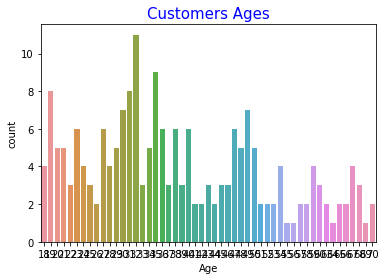

In [185]:
 
sns.countplot(mall_customers_data["Age"])
 
plt.title("Customers Ages",color = 'blue',fontsize=15)

In [186]:
data.age.value_counts()

58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
64    10
41    10
63     9
67     9
55     8
45     8
42     8
53     8
61     8
65     8
43     8
66     7
50     7
48     7
46     7
49     5
47     5
39     4
35     4
68     4
70     4
40     3
71     3
69     3
38     3
34     2
37     2
77     1
76     1
74     1
29     1
Name: age, dtype: int64

In [188]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Text(0.5, 1.0, 'trestbps of  people')

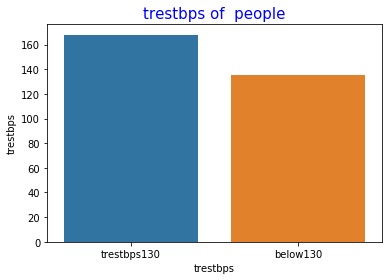

In [189]:
trestbps130 =['trestbps130' if i >= 130 else 'below130' for i in data.trestbps]
df = pd.DataFrame({'trestbps':trestbps130})
sns.countplot(x=df.trestbps)
plt.ylabel('trestbps')
plt.title('trestbps of  people',color = 'blue',fontsize=15)

In [190]:
mall_customers_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Text(0.5, 1.0, 'Gender Counts')

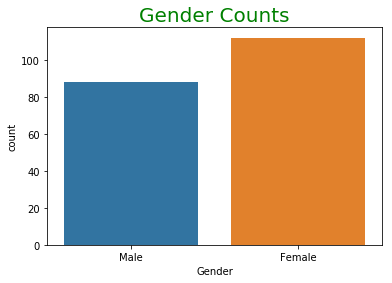

In [191]:
sns.countplot(data=mall_customers_data, x='Gender')
plt.title('Gender Counts',color = 'green',fontsize=20)

Text(0.5, 1.0, 'Fbs')

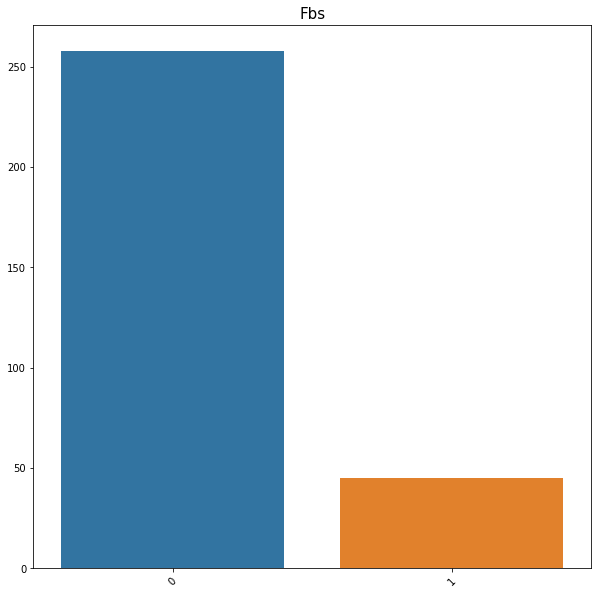

In [192]:
fbs = data.fbs.value_counts()

plt.figure(figsize=(10,10))
sns.barplot(x=fbs[ :5].index,y=fbs[ :5].values)
plt.xticks(rotation=45)
plt.title('Fbs',color = 'black',fontsize=15)

In [193]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [194]:
data.thalach[:4]

0    150
1    187
2    172
3    178
Name: thalach, dtype: int64

Text(0.5, 1.0, 'Thalach numbers')

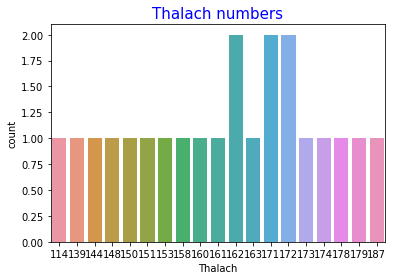

In [195]:
sns.countplot(data.thalach[:22])
plt.xlabel('Thalach')
plt.title('Thalach numbers',color = 'blue', fontsize = 15)

Thank you for your attention.If there any question about this kernel or plots you can ask about.